In [1]:
import pandas as pd

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import numpy as np

import joblib

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (20,8)

In [3]:
df = pd.read_csv('train2.csv').dropna()

In [4]:
df.head()

,time,sin,sawtooth,random,sqrt,equation
1,1000.0,0.000000,0.0,0.830242,0.000000,0.830242
2,1000.2,0.001612,0.2,0.098594,0.447214,2.037573
3,1000.4,0.019298,0.4,0.318506,0.632456,3.394709
4,1000.6,0.025598,0.6,0.816139,0.774597,4.869214
5,1000.8,0.020988,0.8,0.937669,0.894427,5.855663


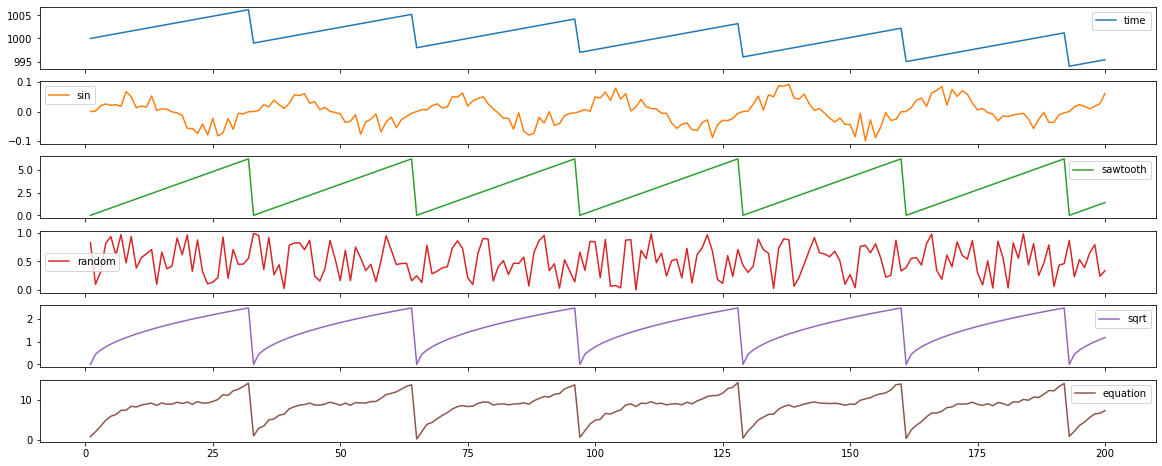

In [5]:
df.iloc[:200, :].plot(subplots=True);

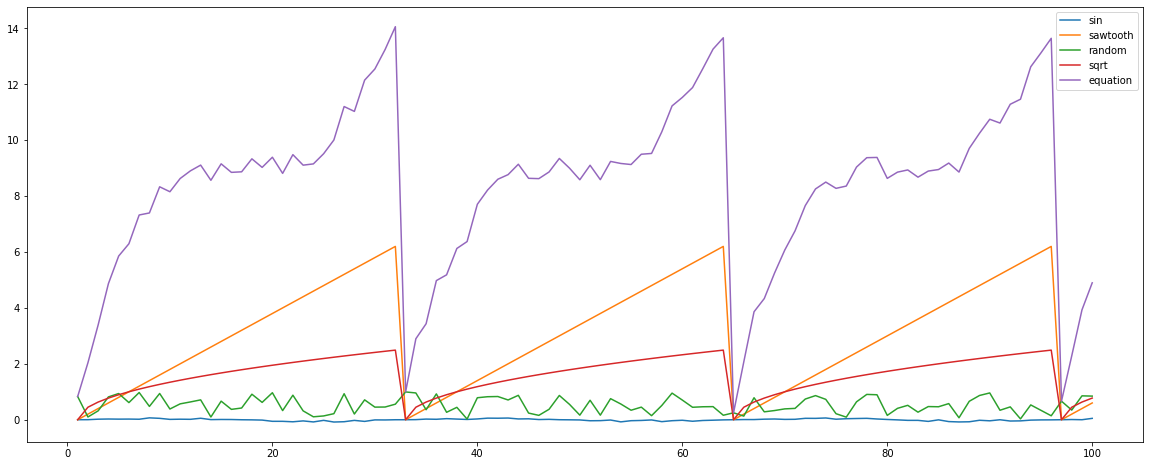

In [6]:
df.iloc[:100, :].drop(columns=['time']).plot();

In [7]:
X, Y = df.drop(columns=['equation', 'time', 'random']), df['equation']

In [8]:
X.head()

,sin,sawtooth,sqrt
1,0.000000,0.0,0.000000
2,0.001612,0.2,0.447214
3,0.019298,0.4,0.632456
4,0.025598,0.6,0.774597
5,0.020988,0.8,0.894427


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=False, test_size=0.1)

In [10]:
model = Ridge(random_state=2021)
model.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=2021, solver='auto', tol=0.001)

In [11]:
model.coef_

array([19.67678287,  0.28277444,  4.28117556])

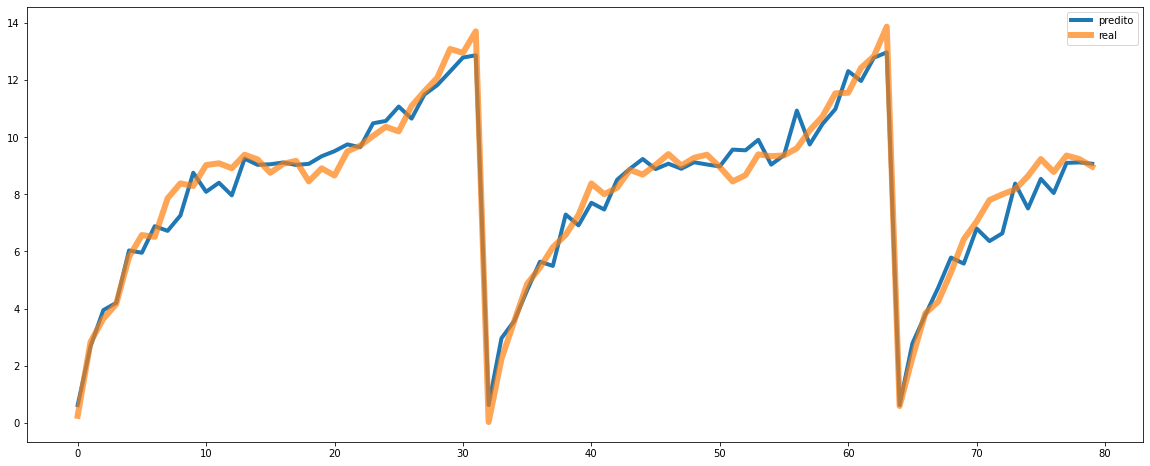

In [12]:
y_pred = model.predict(x_test)
plt.plot(y_pred[:80], lw=4, label='predito')
plt.plot(y_test.values[:80], lw=6, label='real', alpha=0.7)
plt.legend()

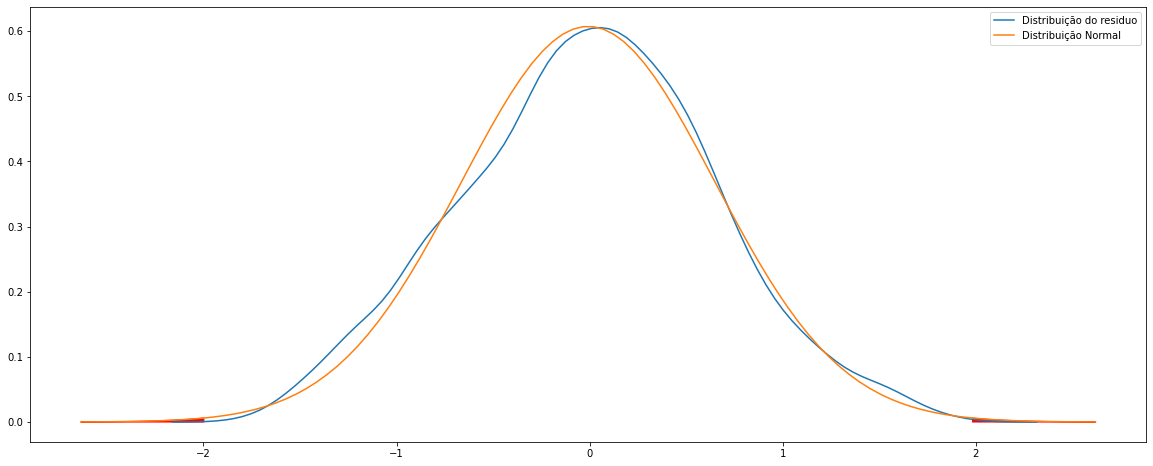

In [13]:
residual = y_pred-y_test.values
fig, ax = plt.subplots()
sns.kdeplot(residual, ax=ax, label='Distribuição do residuo')

mean = residual.mean()
std = residual.std()
x = np.linspace(mean - 4*std, mean + 4*std, 100)
ax.plot(x, stats.norm.pdf(x, mean, std), label='Distribuição Normal')

ax.fill_between(x, stats.norm.pdf(x, mean, std), 0, where=abs(x)>= mean + 3*std, color='red')
plt.legend();

In [14]:
stats.shapiro(np.random.choice(residual, 500))

ShapiroResult(statistic=0.9941777586936951, pvalue=0.05306019261479378)

## Normalidade:
* Por Shapiro Wilk temos normalidade a 95% de confiança

In [15]:
joblib.dump(model, 'model.joblib')
joblib.dump({"mean": mean, "std": std}, 'params.joblib')

['params.joblib']